In [11]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join("..")))

from utils.pricing_market_logic_multiproduct import (
    get_monopoly_prices,
    get_nash_prices,
    get_profits,
    get_quantities,
)
from utils.utils import (
    make_df_from_results,
    plot_duopoly_results_from_df,
)

In [12]:
N_FIRMS = 2
MARGINAL_COST = 1.0
ALPHA = 1

a0 = 0.0
a = tuple([2.0 for _ in range(N_FIRMS)])
mu = 0.25
alpha = tuple([ALPHA for _ in range(N_FIRMS)])
c = tuple([MARGINAL_COST for _ in range(N_FIRMS)])
beta = 100
sigma = 0.25 # critical: this disables nesting → standard logit
group_idxs = tuple([i for i in range(1, N_FIRMS+1)])
WILLIWGNES_TO_PAY = 4.51 * ALPHA

monopoly_prices = get_monopoly_prices(
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    c=c,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)

monopoly_q = get_quantities(
    p=tuple(monopoly_prices),
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)

monopoly_profits = get_profits(
    p=tuple(monopoly_prices),
    c=c,
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)

nash_prices = get_nash_prices(
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
    c=c,
)
nash_q = get_quantities(
    p=tuple(nash_prices),
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)
nash_profits = get_profits(
    p=tuple(nash_prices),
    c=c,
    a0=a0,
    a=a,
    mu=mu,
    alpha=alpha,
    multiplier=beta,
    sigma=sigma,
    group_idxs=group_idxs,
)
print(f"Monopoly prices: {monopoly_prices} | Nash prices: {nash_prices}")
print(f"Monopoly profits: {monopoly_profits} | Monopoly quantities: {monopoly_q}")

Monopoly prices: [1.8859367839279824, 1.8859367841816808] | Nash prices: [1.467837558344815, 1.4678375571705864]
Monopoly profits: [31.796841418045727, 31.796841394883895] | Monopoly quantities: [35.89064366090311, 35.89064362448151]


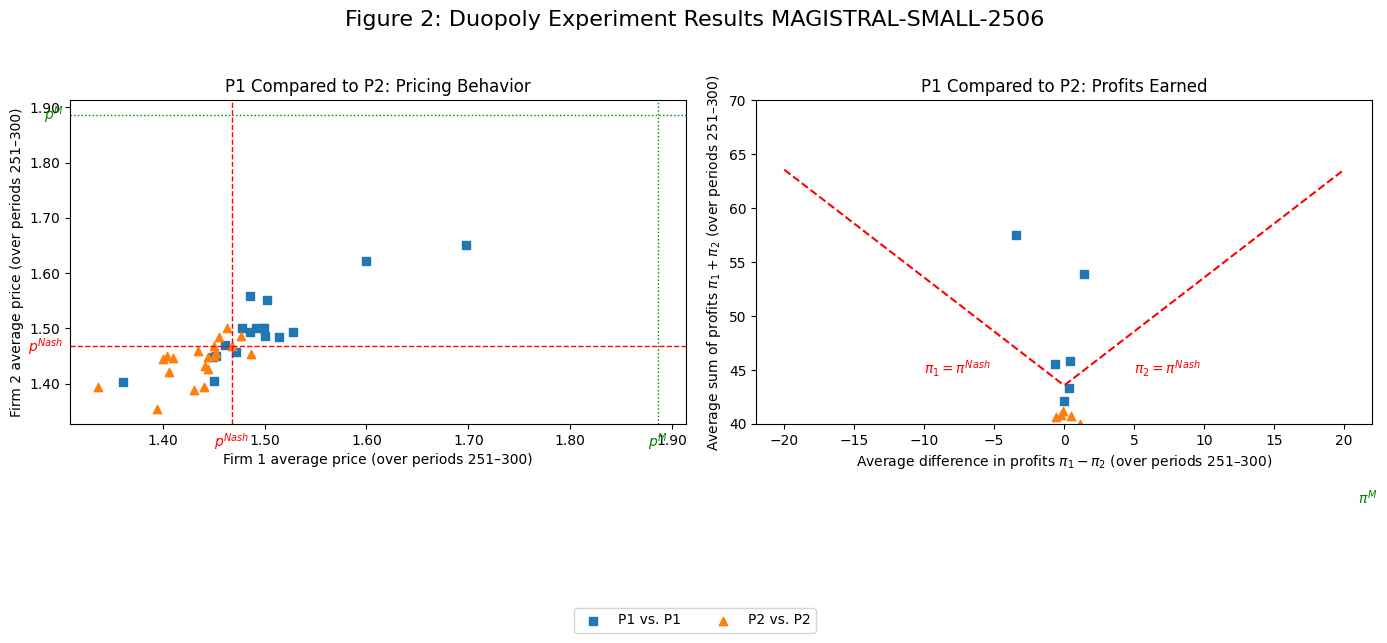

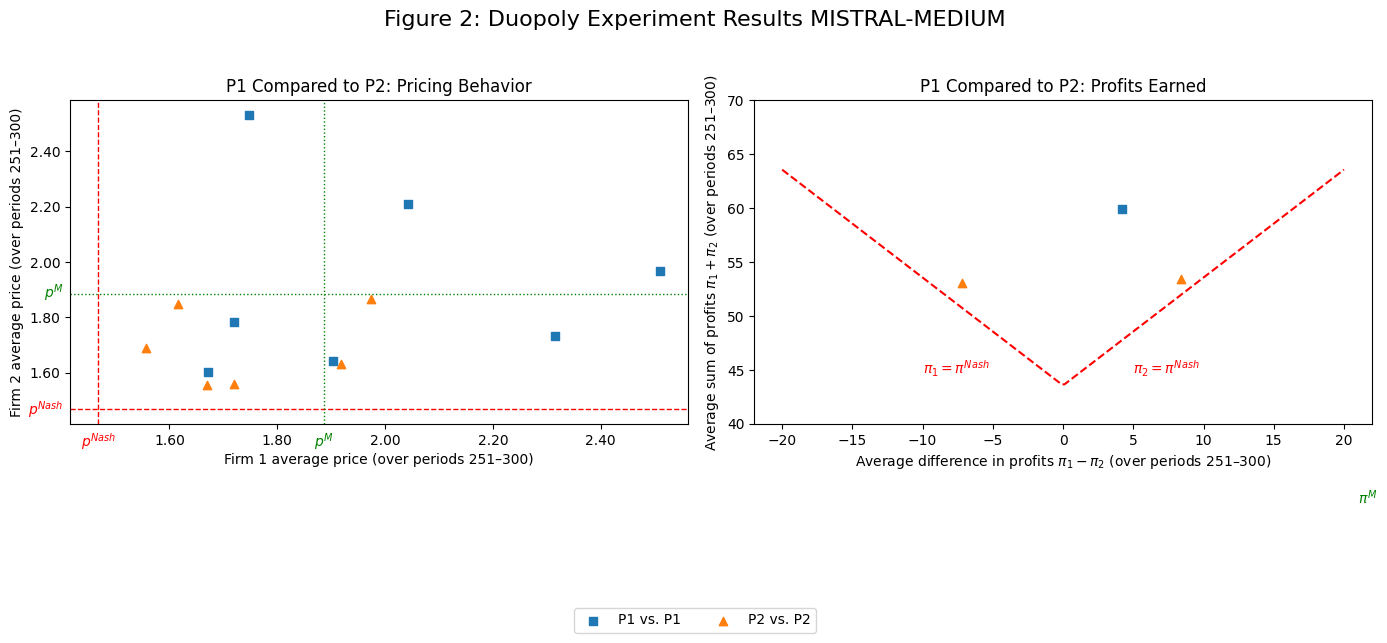

In [15]:
for model in ["magistral-small-2506", "mistral-medium"]:
    df_res = make_df_from_results(results_path='mistral_ai/results/duopoly', model_name=model)
    plot_duopoly_results_from_df(df_res, 
                                p_nash=nash_prices[0], 
                                p_m=monopoly_prices[0], 
                                pi_nash=nash_profits[0], 
                                pi_m=monopoly_profits[0], 
                                title="Figure 2: Duopoly Experiment Results {}".format(model.upper()), 
                                save_path="./imgs/duopoly_results_{}.png".format(model)
    )